## Limpieza del set de datos de Properatti

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

Vamos a tomar la data

In [4]:
df = pd.read_csv("properatti.csv")

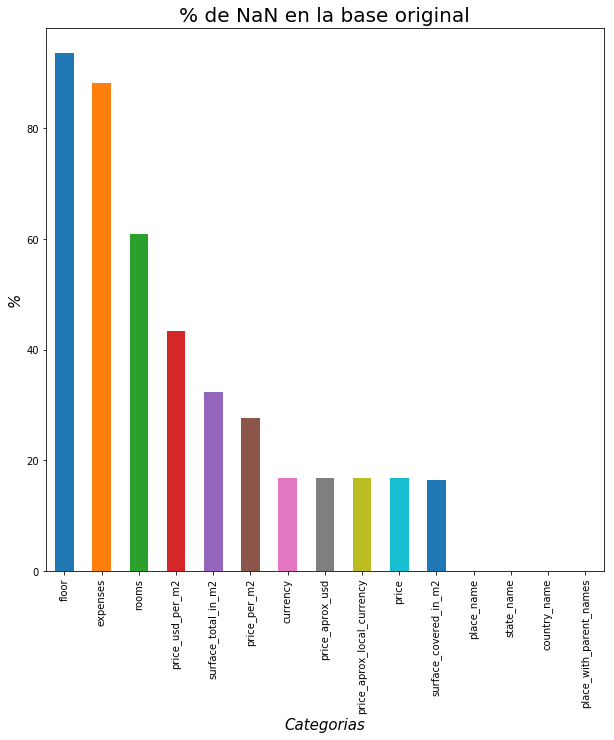

In [5]:
total = 121220
null_01 = np.round((df[["place_name","place_with_parent_names","country_name","state_name","price","currency","price_aprox_local_currency","price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2","price_per_m2","floor","rooms","expenses"]].isnull().sum() / total * 100).sort_values(ascending = False),2)
null_01


null_01.plot(kind = "bar", figsize = (10,10))
plt.title("% de NaN en la base original", size = 20)
plt.xlabel("Categorias",size = 15, style = "italic")
plt.ylabel("%", size = 15, style = "italic")
plt.show()

In [6]:
df.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


Vamos a samplear la data, para empezar la exploración y entender los datos:

In [7]:
df.sample(100)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
80367,80367,sell,house,Lomas de Zamora,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,Bs.As. G.B.A. Zona Sur,NaN,"-34.7530582,-58.4085492",-34.753058,...,60.0,2583.333333,2583.333333,NaN,NaN,NaN,http://www.properati.com.ar/1awqv_venta_casa_l...,"CASA CON DOS DORMITORIOS, LIVING COMEDOR, COCI...",Casa en Lomas de Zamora Oeste,https://thumbs4.properati.com/2/n_IZbX7mQ6q3pO...
58605,58605,sell,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-33.1504158,-60.5219525",-33.150416,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/19w0f_venta_depart...,Venta. Posesion Marzo 2018. Entrega y cuotas a...,Moreno 2000,https://thumbs4.properati.com/4/4njWqR9UKO6HDD...
39802,39802,sell,house,Chascomús,|Argentina|Buenos Aires Interior|Chascomús|Cha...,Argentina,Buenos Aires Interior,NaN,"-35.569014905,-58.0134869963",-35.569015,...,165.0,1090.909091,1090.909091,NaN,5.0,NaN,http://www.properati.com.ar/18pdu_venta_casa_c...,"Venta de Casa 5 AMBIENTES en CENTRO, Chascomús...",CASA EN VENTA,https://thumbs4.properati.com/5/zSCQ1Uvzd-ur9Z...
21002,21002,sell,house,Godoy Cruz,|Argentina|Mendoza|Godoy Cruz|,Argentina,Mendoza,3854963.0,"-32.958968,-68.847971",-32.958968,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/17eds_venta_casa_g...,Corredor Responsable: Real Estate New Generati...,VENTA CASA,https://thumbs4.properati.com/3/SbUd0MTscwJTVk...
89272,89272,sell,store,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,"-34.5962349,-58.3743164",-34.596235,...,50.0,5000.000000,5000.000000,NaN,NaN,2500.0,http://www.properati.com.ar/1b8g7_venta_local_...,Local sobre San Martín a mts de Marcelo T. PB ...,PB y 2 bños - Microcentro,https://thumbs4.properati.com/8/MIGNN4ToT9Ljl6...
114446,114446,sell,apartment,Recoleta,|Argentina|Capital Federal|Recoleta|,Argentina,Capital Federal,3429595.0,"-34.595849,-58.386979",-34.595849,...,201.0,1588.785047,1691.542289,NaN,4.0,NaN,http://www.properati.com.ar/1c9wd_venta_depart...,Venta Depto de 4 Ambientes en Av. Santa Fe 140...,Recoleta Venta 4 Amb. Con Dep. Av. Santa Fe 14...,https://thumbs4.properati.com/2/QBiXtdbmP97dtp...
40899,40899,sell,apartment,Florida,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3433908.0,"-34.531748,-58.499705",-34.531748,...,NaN,NaN,NaN,NaN,1.0,NaN,http://www.properati.com.ar/18sgm_venta_depart...,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en Florida,https://thumbs4.properati.com/3/zqzaDDmcS3PPMv...
101424,101424,sell,house,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,...,350.0,1377.777778,1771.428571,NaN,NaN,NaN,http://www.properati.com.ar/1bpcm_venta_casa_n...,"Increíble casa en dos plantas, 5 dormitorios, ...",Casa en la Alameda- muy grande,https://thumbs4.properati.com/8/Tadvjrj_zdV1Sm...
75464,75464,sell,apartment,Ciudadela,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,Argentina,Bs.As. G.B.A. Zona Oeste,3435376.0,NaN,NaN,...,36.0,1578.947368,1666.666667,NaN,NaN,NaN,http://www.properati.com.ar/1aqba_venta_depart...,Venta Departamento 2 Ambientes a estrenar! – C...,Departamento 2 Ambientes a estrenar - Ciudadela,https://thumbs4.properati.com/2/yj17BAJ_EgUG3b...
103622,103622,sell,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,NaN,NaN,...,29.0,1577.353125,31034.482759,NaN,NaN,NaN,http://www.properati.com.ar/1bs7a_venta_depart...,GARCIA ANDREU - Negocios Inmobiliarios- Ofrec...,Departamento Callao al 1000 - Macrocentro,https://thumbs4.properati.com/9/Lbsra-X3zrCRf2...


### Vamos a borrar outliers: pisos mayores a 45 y operaciones en 'UYU' o 'PEN', asumimos que son ruido y los borramos

In [8]:
df.loc[df['floor']>=45,'floor'] = None
df.loc[df['currency']=='UYU','currency'] = None
df.loc[df['currency']=='PEN','currency'] = None

### Vamos a convertir el texto de las columnas 'title' y 'description' a minúsculas

In [9]:
df['title'] = df['title'].str.lower()
df['description'] = df['description'].str.lower()

### Vamos a entender un poco los campos de la información

Vamos a entender los campos de 'operation':

In [10]:
set(df['operation'])

{'sell'}

Vamos a entender los campos de 'property_type':

In [9]:
set(df['property_type'])

{'PH', 'apartment', 'house', 'store'}

Vamos a entender los campos de 'place_name':

In [10]:
df[["title","description"]]

,title,description
0,2 amb tipo casa sin expensas en pb,"2 ambientes tipo casa planta baja por pasillo,..."
1,venta depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,venta de departamento en décimo piso al frente...
2,2 amb 3er piso con ascensor apto credito,2 ambientes 3er piso lateral living comedor am...
3,ph 3 amb. cfte. reciclado,ph 3 ambientes con patio. hay 3 deptos en lote...
4,depto 2 amb al contrafrente zona centro/plaza ...,departamento con fantástica iluminación natura...
5,"casa barrio 338. sobre calle 3 de caballería, ...","casa en el perímetro del barrio 338, ubicada e..."
6,"muy buen ph al frente dos dormitorios , patio,...",muy buen ph al frente con entrada independient...
7,jose hernandez 1400 monoambiente estrenar cat...,excelente monoambiente a estrenar amplio super...
8,"jose hernandez 1400 dos ambientes estrenar ,...",excelente dos ambientes estrenar amplio super...
9,white 7637 - 2 dormitorios con patio,mednoza al 7600a una cuadra de calle mendozawh...


Vamos a ver la info del Data Frame

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100806 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 no

El campo rooms tiene 47390 entradas válidas. Vamos a ver si podemos completar

# Vamos a completar la información faltante en base a un diccionario

### Creo el diccionario del parser
Cada nueva fila debe tener formato: ['regEx para buscar', 'regEx para extraer números contenidos dentro del resultado de la regEx de búsqueda', 'columna donde buscar', 'columna donde guardar el dato faltante', 'tipo del dato a extraer']

In [12]:
col_names =  ['lookup_regex', 'extract_regex', 'column_to_lookup','column_to_complete','value_type','value_offset','extra_condition']
diccionario  = pd.DataFrame(columns = col_names)
#Nueva fila a agregar al diccionario. Va a tomar números entre 0 y 99 seguidos de entre 1 y 3 espacios, más amb o AMB o AMB.
#Va a revisar la columna 'title' y va a escribir los valores que encuentre en la columna 'rooms'
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}amb|\d{1,2} {1,3}AMB*|\d{1,2} {1,3}Amb*', '\d{1,2}', 'title', 'rooms', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#Nueva fila a agregar al diccionario. Va a tomar números entre 0 y 99 seguidos de entre 1 y 3 espacios, más amb o AMB o AMB.
#Va a revisar la columna 'description' y va a escribir los valores que encuentre en la columna 'rooms'
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}amb|\d{1,2} {1,3}AMB*|\d{1,2} {1,3}Amb*', '\d{1,2}', 'description', 'rooms', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #Nueva fila a agregar
#diccionario.loc[len(diccionario)] = ['/d abc', '/d', 'description', 'metros2', 'float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #Nueva fila a agregar
diccionario.loc[len(diccionario)] = ['monoamb|Monoamb|MONOAMB', '', 'description', 'rooms', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['monoamb|Monoamb|MONOAMB', '', 'title', 'rooms', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}piso|\d{1,2} {1,3}PISO*', '\d{1,2}', 'description', 'floor', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #Nueva fila a agregar
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}piso|\d{1,2} {1,3}PISO*', '\d{1,2}', 'title', 'floor', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #Nueva fila a agregar
diccionario.loc[len(diccionario)] = ['primer|PRIMER|Primer|1er', '', 'title', 'floor', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['primer|PRIMER|Primer|1er', '', 'description', 'floor', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#diccionario.loc[len(diccionario)] = ['decimo|DECIMO|Decimo|décimo', '', 'description', 'floor', 'float',10, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#diccionario.loc[len(diccionario)] = ['decimo|DECIMO|Decimo|décimo', '', 'title', 'floor', 'float',10, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#diccionario.loc[len(diccionario)] = ['segundo|SEGUNDO|Segundo|2do', '', 'title', 'floor', 'float',2, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#diccionario.loc[len(diccionario)] = ['segundo|SEGUNDO|Segundo|2do', '', 'description', 'floor', 'float',2, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#diccionario.loc[len(diccionario)] = ['tercer|TERCER|Tercer|3er', '', 'description', 'floor', 'float',3, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #CHEQUEAR. HAY UN EJEMPLO QUE CUANDO DICE TERCER ENCUENTRA UNA OBSERVACION QUE LITERALMENTE DICE TERCERA EDAD. QUE HACE EL CODIGO EN ESTE CASO?
#diccionario.loc[len(diccionario)] = ['tercer|TERCER|Tercer|3er', '', 'title', 'floor', 'float',3, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#diccionario.loc[len(diccionario)] = ['cuarto|CUARTO|Cuarto|4to', '', 'title', 'floor', 'float',4, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#diccionario.loc[len(diccionario)] = ['cuarto|CUARTO|Cuarto|4to', '', 'description', 'floor', 'float',4, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #mismo caso. Puede llegar a traer una observacion que dice 4 cuartoSS ????
#diccionario.loc[len(diccionario)] = ['quianto|QUINTO|Quinto|5to', '', 'title', 'floor', 'float',5, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#diccionario.loc[len(diccionario)] = ['quinto|QUINTO|Quinto|5to', '', 'description', 'floor', 'float',5, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#diccionario.loc[len(diccionario)] = ['sexto|SEXTO|Sexto|6to', '', 'description', 'floor', 'float',6, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#diccionario.loc[len(diccionario)] = ['sexto|SEXTO|Sexto|6to', '', 'title', 'floor', 'float',6, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['septimo p|SEPTIMO P|Septimo p|7mo', '', 'title', 'floor', 'float',7, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['septimo p|SEPTIMO P|Septimo p|7mo', '', 'description', 'floor', 'float',7, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#diccionario.loc[len(diccionario)] = ['octavo|OCTAVO|Octavo|8vo', '', 'description', 'floor', 'float',8, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#diccionario.loc[len(diccionario)] = ['octavo|OCTAVO|Octavo|8vo', '', 'title', 'floor', 'float',8, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#diccionario.loc[len(diccionario)] = ['noveno|NOVENO|Noveno|9no', '', 'title', 'floor', 'float',9, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#diccionario.loc[len(diccionario)] = ['noveno|NOVENO|Noveno|9no', '', 'description', 'floor', 'float',9, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['piso \d{1,2}|Piso \d{1,2}|PISO \d{1,2}', '\d{1,2}', 'title', 'floor', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['piso \d{1,2}|Piso \d{1,2}|PISO \d{1,2}', '\d{1,2}', 'description', 'floor', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}amb|\d{1,2} {1,3}AMB*|\d{1,2} {1,3}Amb*', '\d{1,2}', 'title', 'rooms', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}Hab|\d{1,2} {1,3}HAB*|\d{1,2} {1,3}Hab*|\d{1,2} {1,3}dorm*', '\d{1,2}', 'title', 'rooms', 'float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}amb|\d{1,2} {1,3}AMB*|\d{1,2} {1,3}Amb*','\d{1,2}','description', 'rooms', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #Nueva fila a agregar
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}hab|\d{1,2} {1,3}HAB*|\d{1,2} {1,3}Hab*|\d{1,2} {1,3}dorm*','\d{1,2}', 'description','rooms', 'float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,7} {0,3}USD|\d{1,7} {0,3}dolar*|\d{1,7} {0,3}dólar*','\d{1,7}','title','price_aprox_usd','float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,7} {0,3}USD|\d{1,7} {0,3}dolar*','\d{1,7}','description','price_aprox_usd','float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,8} {0,3}peso*|\d{1,8} {0,3}Peso*|\d{1,8} {0,3}ARS','\d{1,8}','title', 'price_aprox_local_currency','float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,8} {1,3}peso*|\d{1,8} {1,3}Peso*|\d{1,8} {0,3}ARS','\d{1,8}','description', 'price_aprox_local_currency','float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['Sup {0,3}\d{1,3} {0,3}Mts|SUP {0,3}\d{1,4} {0,3}MTS|sup {0,3}\d{1,4} {0,3}mts', '\d{1,4}', 'title', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['Sup {0,3}\d{1,3} {0,3}Mts|SUP {0,3}\d{1,4} {0,3}MTS|sup {0,3}\d{1,4} {0,3}mts', '\d{1,4}', 'description', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}MTS2|\d{1,4} {0,3}Mts2 |\d{1,4} {0,3}mts2', '\d{1,4}', 'title', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}MTS2|\d{1,4} {0,3}Mts2 |\d{1,4} {0,3}mts2', '\d{1,4}', 'description', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}Ms|\d{1,4} {0,3}MS |\d{1,4} {0,3}ms', '\d{1,4}', 'title', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}Ms|\d{1,4} {0,3}MS |\d{1,4} {0,3}ms', '\d{1,4}', 'description', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}M|\d{1,4} {0,3}m', '\d{1,4}', 'title', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}M|\d{1,4} {0,3}m', '\d{1,4}', 'description', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]

Veo el diccionario:

In [13]:
diccionario

,lookup_regex,extract_regex,column_to_lookup,column_to_complete,value_type,value_offset,extra_condition
0,"\d{1,2} {1,3}amb|\d{1,2} {1,3}AMB*|\d{1,2} {1,...","\d{1,2}",title,rooms,float,0,"{'data_column': 'country_name', 'value': 'Arge..."
1,"\d{1,2} {1,3}amb|\d{1,2} {1,3}AMB*|\d{1,2} {1,...","\d{1,2}",description,rooms,float,0,"{'data_column': 'country_name', 'value': 'Arge..."
2,monoamb|Monoamb|MONOAMB,,description,rooms,float,1,"{'data_column': 'country_name', 'value': 'Arge..."
3,monoamb|Monoamb|MONOAMB,,title,rooms,float,1,"{'data_column': 'country_name', 'value': 'Arge..."
4,"\d{1,2} {1,3}piso|\d{1,2} {1,3}PISO*","\d{1,2}",description,floor,float,0,"{'data_column': 'country_name', 'value': 'Arge..."
5,"\d{1,2} {1,3}piso|\d{1,2} {1,3}PISO*","\d{1,2}",title,floor,float,0,"{'data_column': 'country_name', 'value': 'Arge..."
6,primer|PRIMER|Primer|1er,,title,floor,float,1,"{'data_column': 'country_name', 'value': 'Arge..."
7,primer|PRIMER|Primer|1er,,description,floor,float,1,"{'data_column': 'country_name', 'value': 'Arge..."
8,septimo p|SEPTIMO P|Septimo p|7mo,,title,floor,float,7,"{'data_column': 'country_name', 'value': 'Arge..."
9,septimo p|SEPTIMO P|Septimo p|7mo,,description,floor,float,7,"{'data_column': 'country_name', 'value': 'Arge..."


Defino la función que procesa el dataframe iterando en base al diccionaro:

In [14]:
def df_parser(data,parse_dictionary):
    for pattern_row_index, pattern in parse_dictionary.iterrows():
        #print ("Looking for regular expression: '" + pattern["lookup_re"] + "' in column: '" + pattern["column_to_lookup"] + "', extracting number with regEx: '" + pattern["extract_re"]+"' and assigning value to column: '" + pattern["column_to_complete"] + "'")
        #print(pattern['extra_condition'])
        for data_row_index, row in data[ (data[pattern["column_to_complete"]].isnull() == True) &
                                         (pattern['extra_condition']['condition_func'] (data[pattern['extra_condition']['data_column']],pattern['extra_condition']['value']) == True) ].iterrows():
                                         #(1==1) ].iterrows():
        #for data_row_index, row in data.iterrows():
            #print(data.loc[data_row_index,pattern["column_to_complete"]])
            if type(data.loc[data_row_index,pattern["column_to_lookup"]]) is str and data.loc[data_row_index,pattern["column_to_lookup"]] != '':
                #print('Missing data here ...')
                matches = re.search(pattern["lookup_regex"], data.loc[data_row_index,pattern["column_to_lookup"]])
                if matches:
                    #print('Encontró: ')
                    #print(matches.group(0)) #Imprime el valor encontrado dentro del campo que se está interpretando
                    #print('En: ')
                    #print(data.loc[data_row_index,pattern["column_to_lookup"]])
                    #print(data.loc[data_row_index,pattern["column_to_complete"]]) #Imprime el valor encontrado del campo que se está intentando llenar
                    #print(re.search(pattern["extract_regex"], matches.group(0)).group(0)) #Imprime el string que va a ser extraído para convertir a número
                    if (pattern["value_type"] == 'float') and (pattern["extract_regex"] != ''):
                        number = float( re.search(pattern["extract_regex"], matches.group(0)).group(0) ) + pattern["value_offset"]
                    elif (pattern["value_type"] == 'int') and (pattern["extract_regex"] != ''):
                        number = int( re.search(pattern["extract_regex"], matches.group(0)).group(0) ) + pattern["value_offset"]
                    elif pattern["value_type"] == 'float':
                        number = float(pattern["value_offset"])
                    else:
                        number = int(pattern["value_offset"])
                    data.loc[data_row_index,pattern["column_to_complete"]] = number
                    #print('Escribió: ')
                    #print(number)
                    #print(data.loc[data_row_index,pattern["column_to_complete"]])
    return

### Corro la función para parsear la información

In [15]:
df_parser(df,diccionario)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100806 non-null object
price_aprox_local_currency    100840 non-null float64
price_aprox_usd               100825 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         108686 no

El campo rooms antes tenía 47390 entradas válidas. Ahora vemos que tiene 93450 entradas válidas

In [17]:
#Esta funcion se puede usar para ir viendo que palabras clave estan contenidas en el titulo/descripción
df[df["title"].str.contains("primer","segundo")]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
63,63,sell,house,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Pilar|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4690857,-58.9134611",-34.469086,...,140.0,1135.714286,1135.714286,1.0,1.0,NaN,http://www.properati.com.ar/15bvv_venta_casa_p...,casa con local y departamento en primer piso. ...,"casa , local y departamento en primer piso!!!",https://thumbs4.properati.com/7/sZe2JL4bTUIKQO...
151,151,sell,house,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-38.013313,-57.5595069",-38.013313,...,NaN,NaN,NaN,1.0,4.0,NaN,http://www.properati.com.ar/15d8z_venta_casa_m...,la propiedad es sobre lote propio y cuenta con...,san luis y primera junta,https://thumbs4.properati.com/6/mSveyfVKWos2ek...
1242,1242,sell,apartment,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4465229,-58.6338743",-34.446523,...,108.0,2349.921250,52763.305556,1.0,5.0,NaN,http://www.properati.com.ar/15hp2_venta_depart...,emprendimiento de la mano de constantini dentr...,los castaños | las piedras - unidad 1205 - dup...,https://thumbs4.properati.com/7/2oB5cJHFldk9Gt...
1243,1243,sell,apartment,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4465229,-58.6338743",-34.446523,...,108.0,2349.921250,52763.305556,1.0,5.0,NaN,http://www.properati.com.ar/15hp4_venta_depart...,emprendimiento de la mano de constantini dentr...,los castaños | las piedras - unidad 1205 - dup...,https://thumbs4.properati.com/7/9GXsOtl_iAEdpV...
1313,1313,sell,apartment,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.40014,-58.64985",-34.400140,...,55.0,2307.692308,2727.272727,1.0,2.0,NaN,http://www.properati.com.ar/15hu2_venta_depart...,"antares senior living tiene un diseño moderno,...",el portal | antares | departamento en venta co...,https://thumbs4.properati.com/8/W-Bvzy_OoSv4_5...
1315,1315,sell,apartment,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.40014,-58.64985",-34.400140,...,55.0,2307.692308,2727.272727,1.0,2.0,NaN,http://www.properati.com.ar/15hu4_venta_depart...,"antares senior living tiene un diseño moderno,...",el portal | antares | departamento en venta co...,https://thumbs4.properati.com/8/trC9bc9WE7MPBO...
1899,1899,sell,house,Merlo,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|,Argentina,Bs.As. G.B.A. Zona Oeste,3430696.0,"-34.70119476,-58.69696426",-34.701195,...,85.0,NaN,NaN,1.0,2.0,NaN,http://www.properati.com.ar/15jk3_venta_casa_m...,casa a 2 cuadras de av eva peron y a 1/ cuadra...,u$d 65.000 - casa en venta - primera junta ...,https://thumbs4.properati.com/6/EdfjFy6xRWxqrK...
4848,4848,sell,house,San Telmo,|Argentina|Capital Federal|San Telmo|,Argentina,Capital Federal,3428113.0,"-34.6197137,-58.3784768",-34.619714,...,173.0,1118.881119,1849.710983,1.0,2.0,NaN,http://www.properati.com.ar/15obe_venta_casa_s...,"casa en planta baja , 2 habitaciones , cocina ...",casa en planta baja y primer piso con terraza,https://thumbs4.properati.com/0/k7u-UMOznMv7rz...
4865,4865,sell,apartment,Pinamar,|Argentina|Buenos Aires Costa Atlántica|Pinamar|,Argentina,Buenos Aires Costa Atlántica,3429971.0,"-37.1263756577,-56.86351985",-37.126376,...,NaN,NaN,NaN,1.0,2.0,NaN,http://www.properati.com.ar/15oci_venta_depart...,"living, comedor, cocina integrada, 2 dormitori...",exclusivo departamento estrenar en primera li...,https://thumbs4.properati.com/4/cAH5wsdcIZc6N3...
5110,5110,sell,PH,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-37.9899168,-57.5745657",-37.989917,...,85.0,593.125000,1116.470588,1.0,4.

### Finalmente, vamos a calcular los valores u$d/m2 en donde falten:

Los que pusieron dólares, van a recibir dólares

In [18]:
df.loc[ df['price_usd_per_m2'].isnull() == True,'price_usd_per_m2'] = df.loc[ df['price_usd_per_m2'].isnull() == True,'price_aprox_local_currency']/df.loc[ df['price_usd_per_m2'].isnull() == True,'surface_covered_in_m2']

In [19]:
df.loc[ df['price_per_m2'].isnull() == True,'price_per_m2'] = df.loc[ df['price_per_m2'].isnull() == True,'price_aprox_local_currency']/df.loc[ df['price_per_m2'].isnull() == True,'surface_covered_in_m2']

Los que pusieron pesos, van a recibir pesos

### Vamos a interpretar nuevamente la información con gráficos

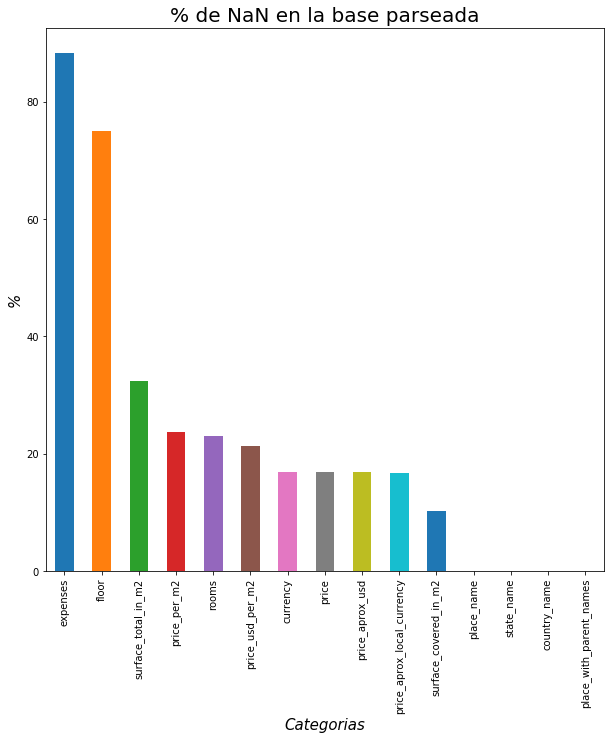

In [20]:
total = 121220
null_01 = np.round((df[["place_name","place_with_parent_names","country_name","state_name","price","currency","price_aprox_local_currency","price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2","price_per_m2","floor","rooms","expenses"]].isnull().sum() / total * 100).sort_values(ascending = False),2)
#null_01
null_01.plot(kind = "bar", figsize = (10,10))
plt.title("% de NaN en la base parseada", size = 20)
plt.xlabel("Categorias",size = 15, style = "italic")
plt.ylabel("%", size = 15, style = "italic")
plt.show()

Enumeramos valores unicos dentro de a columna 'state_name' para corroborar cuales son las zonas entre las que se encuentran distribuidas las propiedades.

In [11]:
set(df['state_name'])

{'Bs.As. G.B.A. Zona Norte',
 'Bs.As. G.B.A. Zona Oeste',
 'Bs.As. G.B.A. Zona Sur',
 'Buenos Aires Costa Atlántica',
 'Buenos Aires Interior',
 'Capital Federal',
 'Catamarca',
 'Chaco',
 'Chubut',
 'Corrientes',
 'Córdoba',
 'Entre Ríos',
 'Formosa',
 'Jujuy',
 'La Pampa',
 'La Rioja',
 'Mendoza',
 'Misiones',
 'Neuquén',
 'Río Negro',
 'Salta',
 'San Juan',
 'San Luis',
 'Santa Cruz',
 'Santa Fe',
 'Santiago Del Estero',
 'Tierra Del Fuego',
 'Tucumán'}

Creamos un diccionario donde cada llave es un barrio y dentro de ella se guardan todos los precios que tiene asociados en nuestro dataframe.

In [12]:
dic_place = dict()
for state in df['state_name']:
    dic_place[state]=[]

In [13]:
print(dic_place)

{'Capital Federal': [], 'Bs.As. G.B.A. Zona Sur': [], 'Buenos Aires Costa Atlántica': [], 'Entre Ríos': [], 'Bs.As. G.B.A. Zona Norte': [], 'Santa Fe': [], 'Córdoba': [], 'Bs.As. G.B.A. Zona Oeste': [], 'Misiones': [], 'Buenos Aires Interior': [], 'Salta': [], 'Neuquén': [], 'Río Negro': [], 'San Luis': [], 'Mendoza': [], 'Corrientes': [], 'Chubut': [], 'Tucumán': [], 'La Pampa': [], 'Chaco': [], 'San Juan': [], 'Santa Cruz': [], 'Tierra Del Fuego': [], 'Catamarca': [], 'Santiago Del Estero': [], 'Jujuy': [], 'La Rioja': [], 'Formosa': []}


In [14]:
for i in range(len(df.price_aprox_usd)):
    dic_place[df.state_name[i]].append(df.price_aprox_usd[i])

In [15]:
dic_place

{'Capital Federal': [62000.0,
  72000.0,
  95000.0,
  138000.0,
  195000.0,
  111700.0,
  147900.0,
  239000.0,
  350000.0,
  270500.0,
  75000.0,
  145000.0,
  480000.0,
  70000.0,
  240000.0,
  550000.0,
  110000.0,
  170500.0,
  220410.0,
  222780.0,
  250000.0,
  108000.0,
  173000.0,
  72900.0,
  79851.93,
  109900.0,
  170000.0,
  490000.0,
  440000.0,
  320000.0,
  178000.0,
  370000.0,
  249000.0,
  219500.0,
  129000.0,
  128000.0,
  118000.0,
  93000.0,
  160000.0,
  380000.0,
  315000.0,
  295000.0,
  73800.0,
  72000.0,
  235000.0,
  240000.0,
  nan,
  175000.0,
  550000.0,
  nan,
  62000.0,
  1100000.0,
  237895.0,
  237895.0,
  99000.0,
  nan,
  229000.0,
  135000.0,
  620000.0,
  92600.0,
  445000.0,
  165000.0,
  147300.0,
  550000.0,
  88900.0,
  1195000.0,
  340000.0,
  53000.0,
  120000.0,
  440000.0,
  238000.0,
  267500.0,
  305000.0,
  98000.0,
  135000.0,
  95000.0,
  181000.0,
  470000.0,
  770000.0,
  370000.0,
  350000.0,
  245000.0,
  430000.0,
  430000.0,
  

In [16]:
df5 = pd.DataFrame.from_dict(dic_place, orient='index')

In [17]:
df5

,0,1,2,3,4,5,6,7,8,9,...,32306,32307,32308,32309,32310,32311,32312,32313,32314,32315
Capital Federal,62000.00,72000.00,95000.00,138000.00,195000.00,111700.00,147900.00,239000.00,350000.00,270500.00,...,120000.0,74500.0,165000.0,128000.0,165000.0,410000.0,410000.0,870000.0,131500.0,129000.0
Bs.As. G.B.A. Zona Sur,150000.00,460000.00,NaN,NaN,120000.00,165000.00,130000.00,NaN,NaN,330000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Buenos Aires Costa Atlántica,64000.00,235000.00,350000.00,85000.00,115000.00,62000.00,51000.00,175000.00,NaN,150000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Entre Ríos,NaN,145817.55,62315.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bs.As. G.B.A. Zona Norte,130000.00,150000.00,115000.00,250000.00,315000.00,570000.00,82000.00,265000.00,650000.00,178000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Santa Fe,25798.49,300000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Córdoba,70000.00,NaN,30846.02,70104.59,NaN,875000.00,990000.00,50000.00,1250000.00,260000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bs.As. G.B.A. Zona Oeste,290000.00,355000.00,358550.00,362150.00,NaN,260000.00,NaN,NaN,64800.00,75000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Misiones,200000.00,308460.22,300000.00,288000.00,NaN,34771.87,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Buenos Aires Interior,150000.00,130000.00,NaN,455000.00,170000.00,46269.03,150000.00,385000.00,320000.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
